# Data Exploration of Movie Data

In [17]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [18]:
movie_dataset = pd.read_csv("resources/movie_metadata.csv")
movie_dataset = movie_dataset.drop_duplicates(subset="movie_title")
movies = movie_dataset[["num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "content_rating", "actor_1_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "num_user_for_reviews", "budget", "actor_2_facebook_likes", "movie_facebook_likes", "imdb_score", "duration", "genres"]]
movies = movies.dropna(how="any")
movies.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,content_rating,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score,duration,genres
0,723.0,0.0,855.0,PG-13,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,33000,7.9,178.0,Action|Adventure|Fantasy|Sci-Fi
1,302.0,563.0,1000.0,PG-13,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,0,7.1,169.0,Action|Adventure|Fantasy
2,602.0,0.0,161.0,PG-13,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,85000,6.8,148.0,Action|Adventure|Thriller
3,813.0,22000.0,23000.0,PG-13,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,164000,8.5,164.0,Action|Thriller
5,462.0,475.0,530.0,PG-13,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,24000,6.6,132.0,Action|Adventure|Sci-Fi


## Summary Statistics for Each Attribute

* The average gross for a movie is around 51.8 million dollars
* The average movie budget is around 45.5 million dollars, which is around the average gross
* The average IMDB score is around 6.5
* The average movie duration is around 110 minutes
* The facebook like attributes range from 0 to hundreds of thousands
    * It is unclear whether the zeros mean that a certain actor or director doesn't have a facebook account or whether the facebook likes are actually zero


In [19]:
print(movies.describe())

       num_critic_for_reviews  director_facebook_likes  \
count             3731.000000              3731.000000   
mean               162.514071               797.798713   
std                122.617903              3060.594061   
min                  1.000000                 0.000000   
25%                 73.000000                10.000000   
50%                134.000000                58.000000   
75%                219.000000               224.000000   
max                813.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3731.000000             3731.000000  3.731000e+03   
mean               744.865720             7580.906995  5.094861e+07   
std               1833.166621            15525.128762  6.898431e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                187.500000              726.500000  7.156829e+06   
50%                430.000000             1000.0000

* There are 2,176 rows with at least one zero in the facebook like attributes
* Will most likely not be able to exclude these rows, as it will greatly decrease the size of the data set by over half

In [20]:
# Selecting rows in which at least one of the facebook likes attributes is 0
zeros = movies.loc[(movies["actor_1_facebook_likes"] == 0) | (movies["director_facebook_likes"] == 0) | (movies["actor_3_facebook_likes"] == 0)
                | (movies["cast_total_facebook_likes"] == 0) | (movies["actor_2_facebook_likes"] == 0) | 
                (movies["movie_facebook_likes"] == 0)]
len(zeros)


2126

## Feature Distribution

### Distribution of the Gross
* There seems to be a lot of outliers

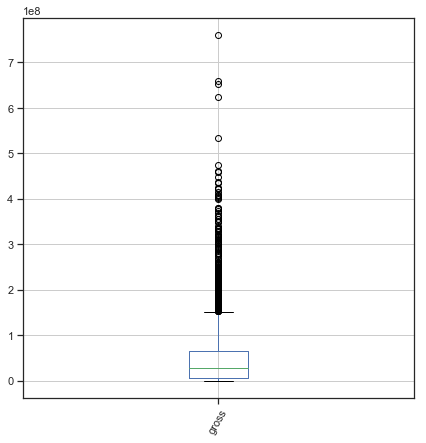

In [21]:
numericalone = movies[["gross"]]
numericalone.boxplot(rot=60, figsize=(7,7))

### Distribution of Facebook Likes Attributes
* The movie facebook likes and the cast's total facebook likes attributes seem to have the largest number of outliers compared to the other
    attributes

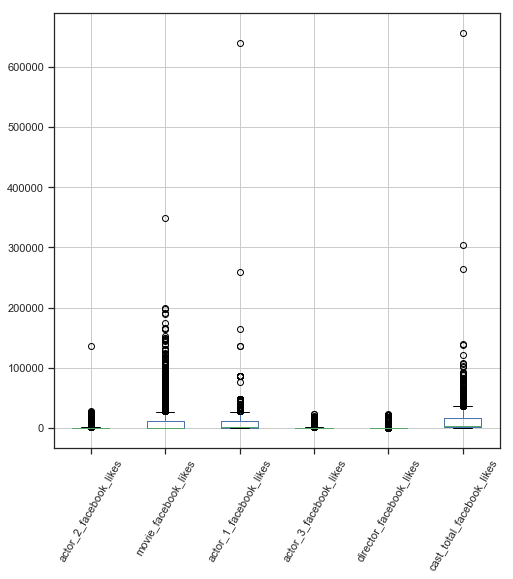

In [22]:
numericaltwo = movies[["actor_2_facebook_likes", "movie_facebook_likes", "actor_1_facebook_likes", "actor_3_facebook_likes", "director_facebook_likes", "cast_total_facebook_likes"]]
numericaltwo.boxplot(rot=60, figsize=(8,8))

### Distribution of the Number of Users that Voted
* There seems to be a lot of outliers

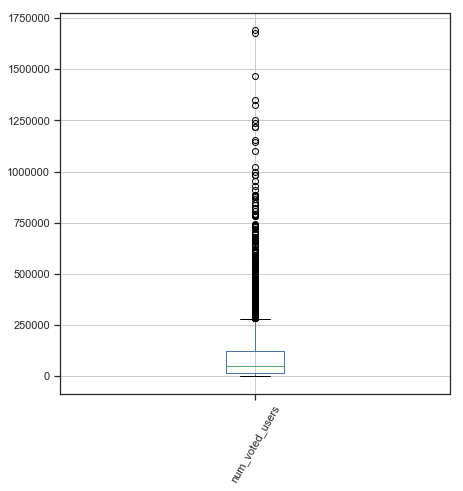

In [23]:
numericalthree = movies[["num_voted_users"]]
numericalthree.boxplot(rot=60, figsize=(7,7))

### Distribution of the Number of Users that Left Reviews
* There seems to be a lot of outliers

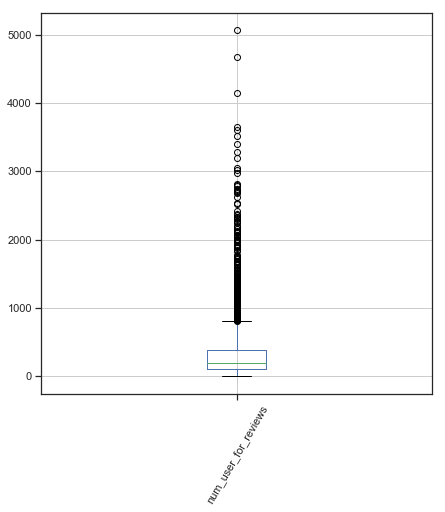

In [24]:
numericalfour = movies[["num_user_for_reviews"]]
numericalfour.boxplot(rot=60, figsize=(7,7))

### Distribution of Budget
* There seems to be only a few outliers

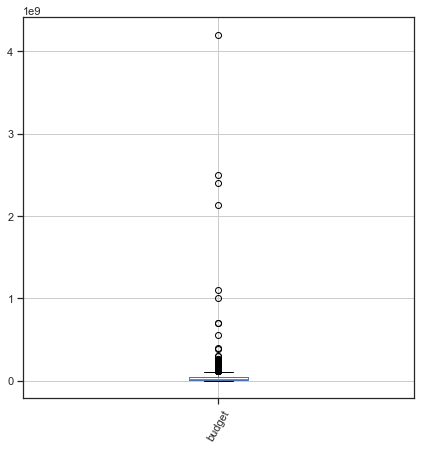

In [25]:
numericalfive = movies[["budget"]]
numericalfive.boxplot(rot=60, figsize=(7,7))

### Distribution of the IMDB Score, Duration, and Number of Critics in the Reviews
* The number of critics in the reviews seems to have the largest amount of outliers compared to the other two

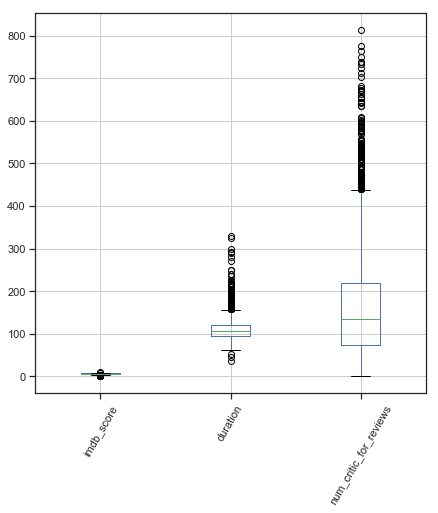

In [26]:
numericalsix = movies[["imdb_score", "duration", "num_critic_for_reviews"]]
numericalsix.boxplot(rot=60, figsize=(7,7))

In [27]:
# sns.boxplot(data=numericalone)
# fig=plt.gcf()
# fig.set_size_inches(5,5)

# #Check for outliers in data using boxplot
# sns.boxplot(data=movies[["cast_total_facebook_likes"]])
# fig=plt.gcf()
# fig.set_size_inches(8,8)

### Histogram
* Possible normal distribution for IMDB Score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a164efcf8>,
      dtype=object)

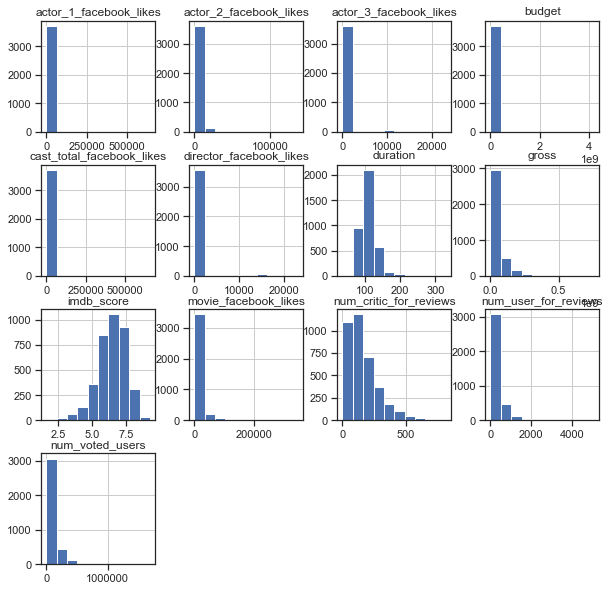

In [28]:
movies.hist(figsize=(10, 10))

## Relationships Between Attributes
* Possible correlation between number of critics for reviews vs. movie facebook likes, number of users for reviews, and number of users who voted
* Possible correaltion between gross vs number of users for review and number of users that voted
* Possible correaltion between number of users that voted and number of users for review

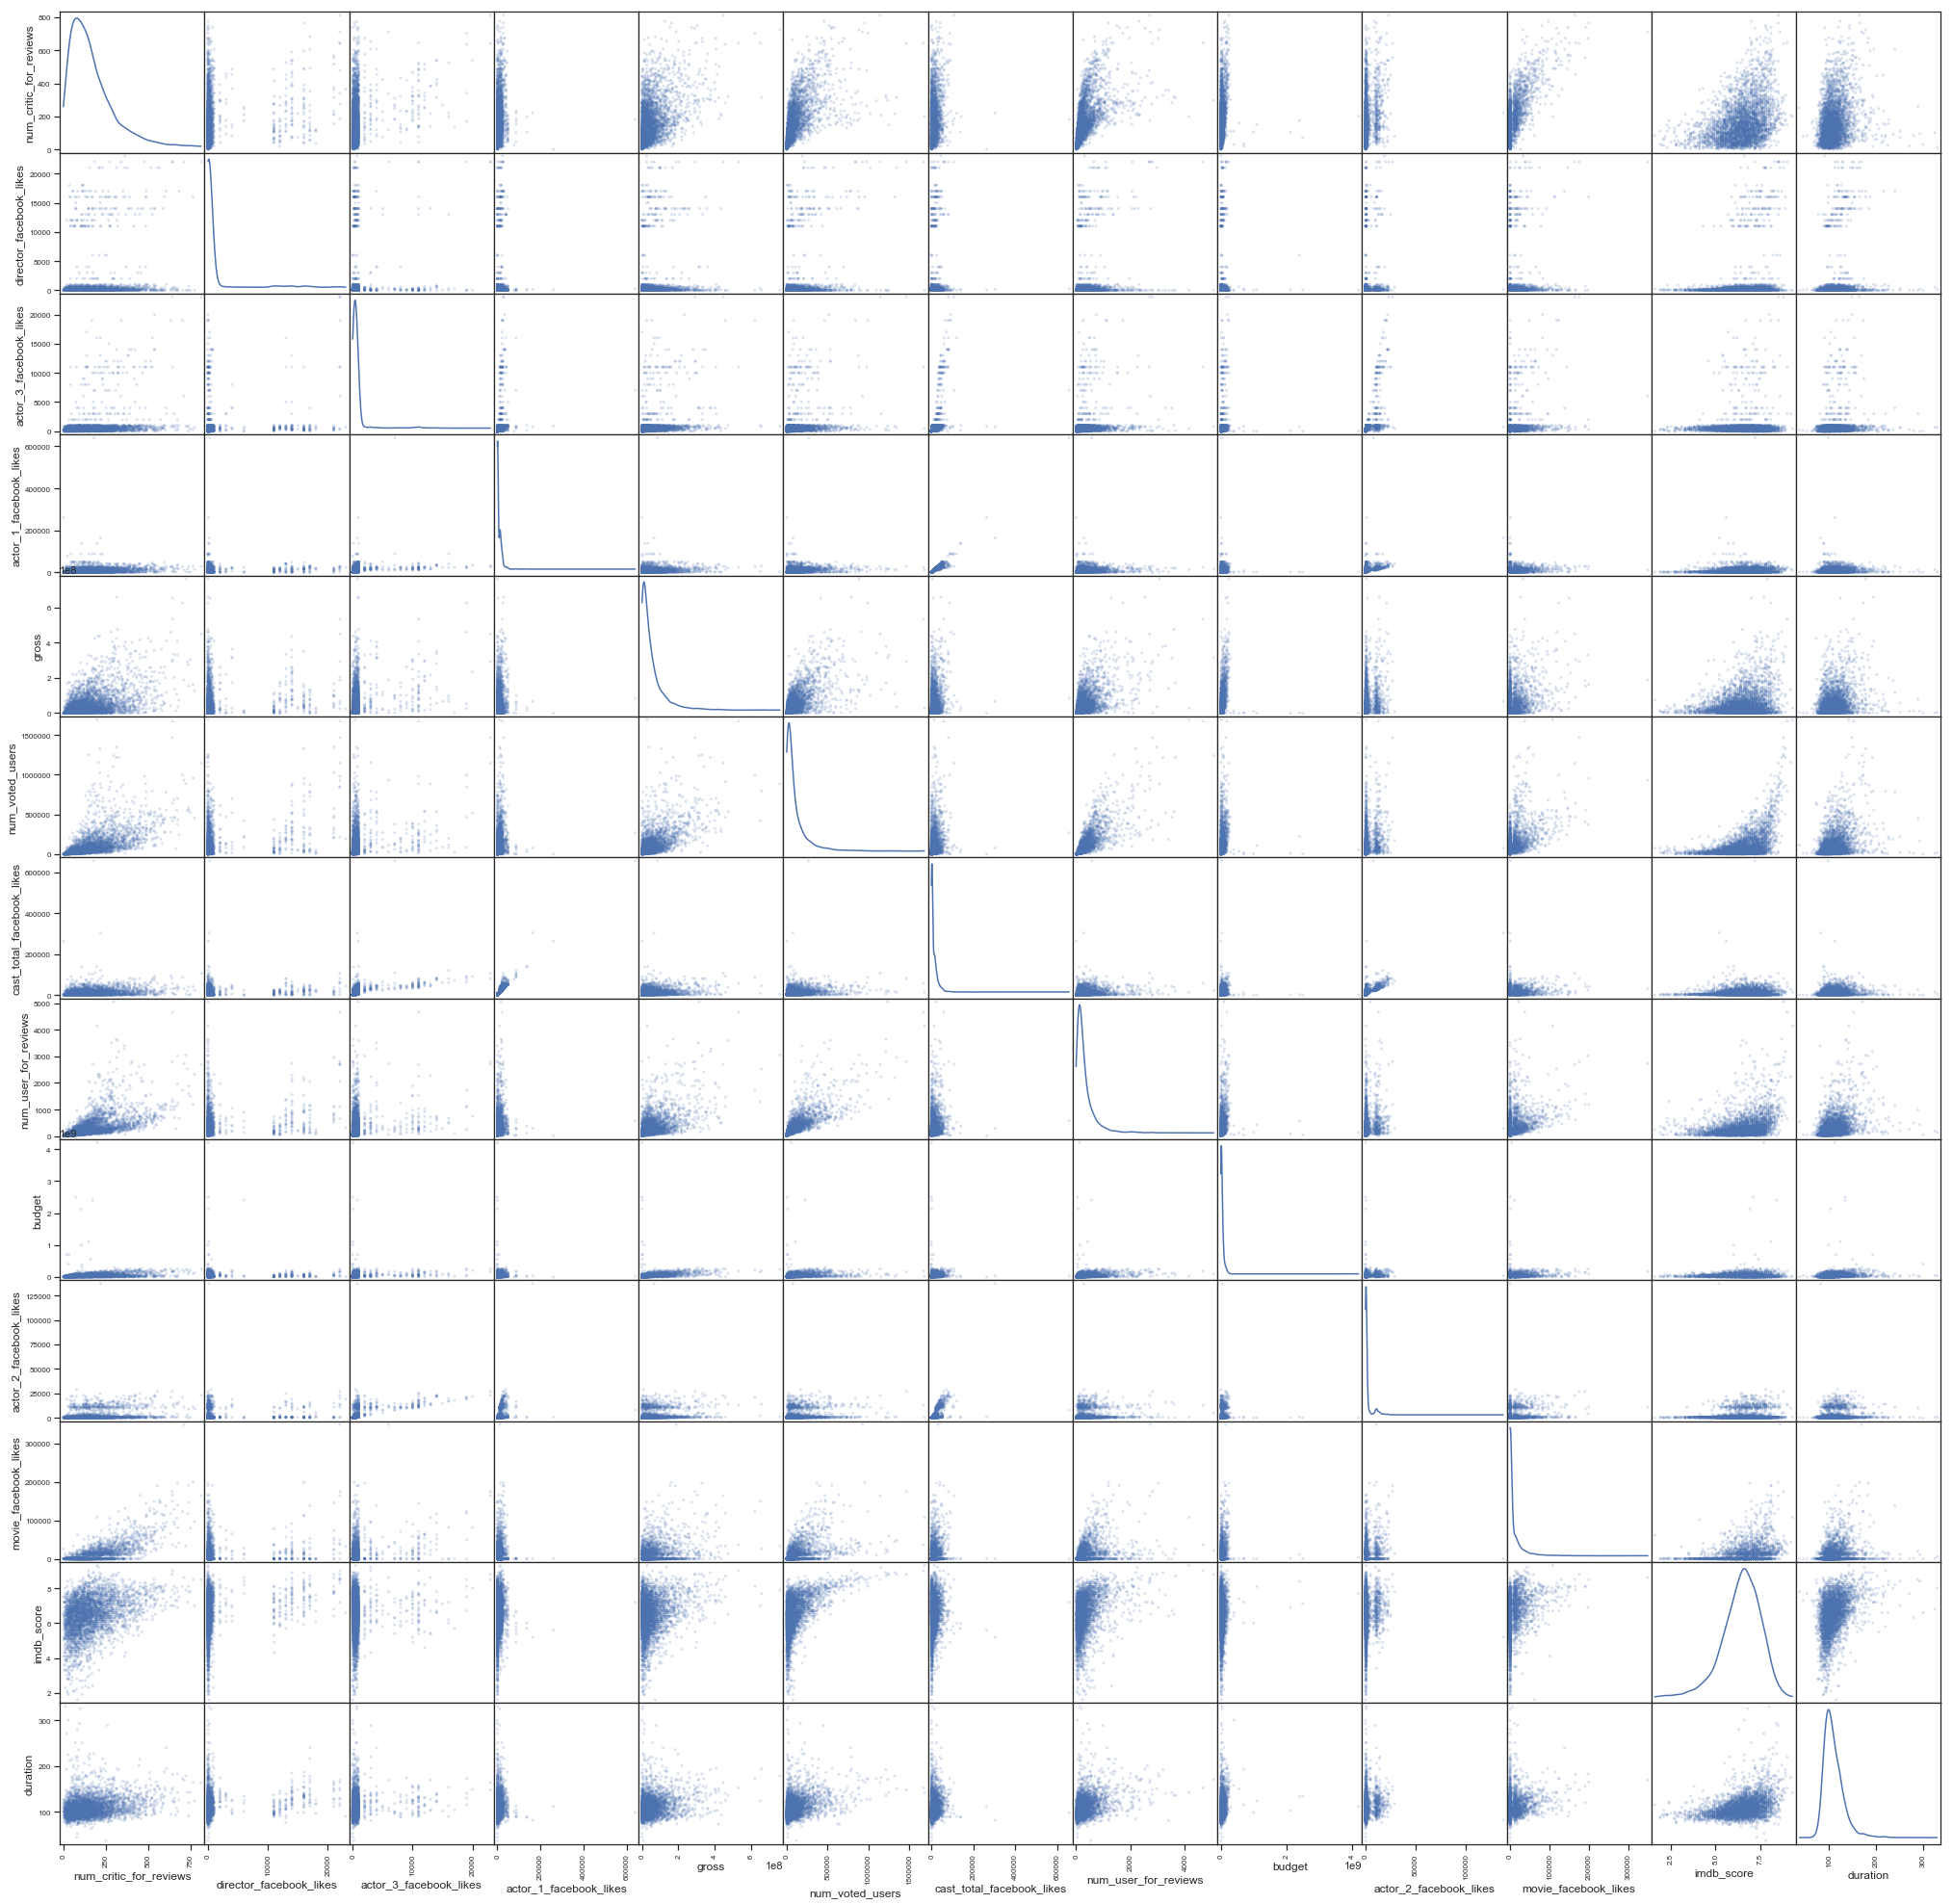

<Figure size 432x288 with 0 Axes>

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(movies, alpha=0.2, figsize=(35,35), diagonal="kde")
plt.show()
plt.savefig("scatter_matrix.png")

### A lot of the distributions are positively skewed
* Outliers are once again evident

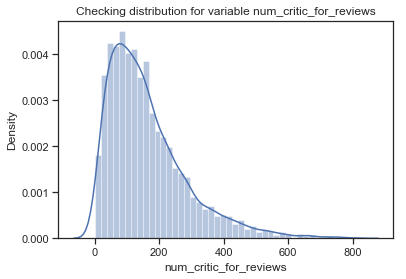

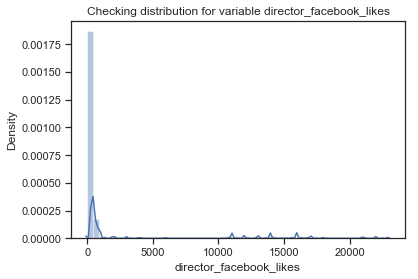

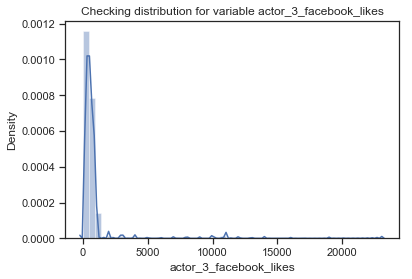

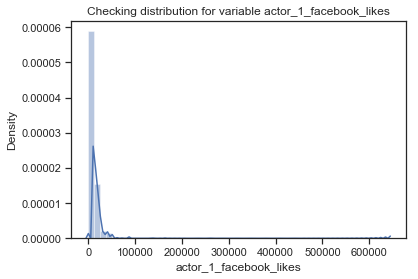

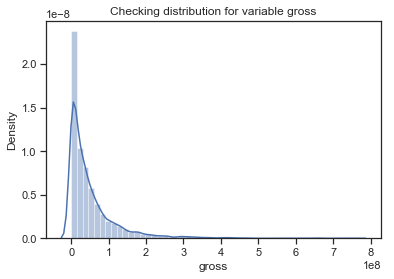

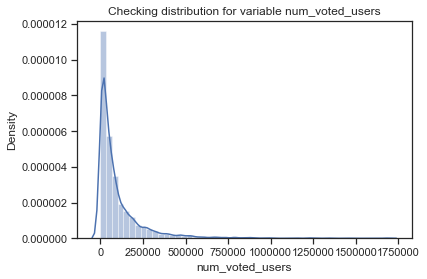

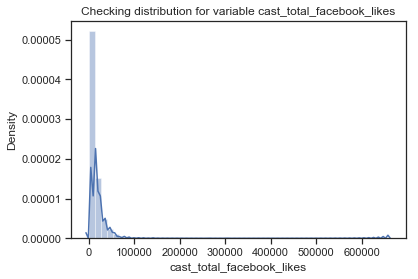

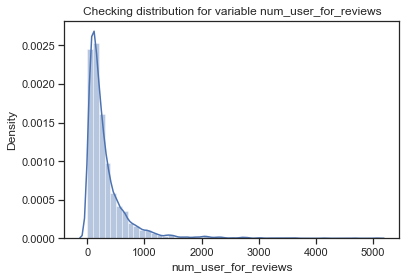

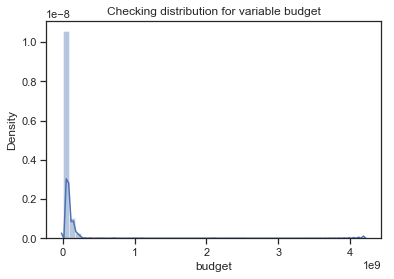

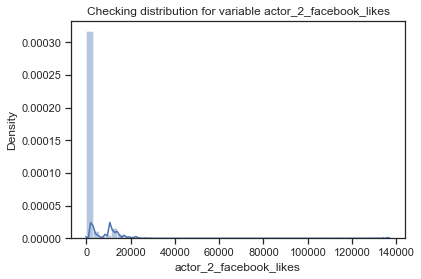

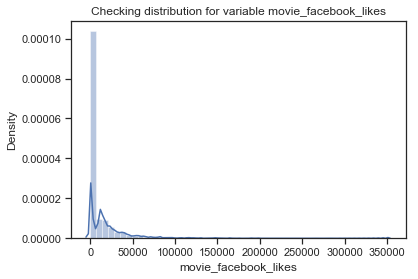

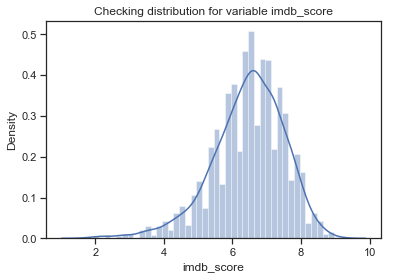

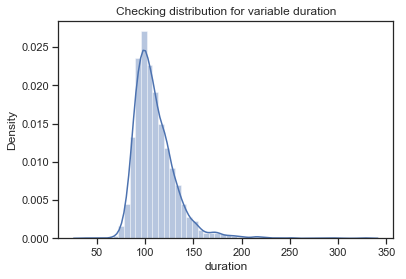

In [30]:
for feat in movies.columns:
    if feat != "genres" and feat != "content_rating":
        sns.distplot(movies[feat])
        plt.title("Checking distribution for variable " + feat)
        plt.ylabel("Density")
        plt.show()